In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [2]:
f1_data = pd.read_csv('data.csv')  

In [3]:
race1_data = f1_data[f1_data["race_circuit"] == "race_01_albert_park"]
# f1_data["race_circuit"].drop_duplicates()[0:1] # Alternative race track selection method

In [4]:
driver_names = [
    ["bottas","V. Bottas"],
    ["hamilton","L. Hamilton"],
    ["vettel","S. Vettel"],
    ["max_verstappen","M. Verstappen"],
    ["leclerc","C. Leclerc"],
    ["kevin_magnussen","K. Magnussen"],
    ["grosjean","R. Grosjean"],
    ["hulkenberg","N. Hulkenberg"],
    ["raikkonen", "K. Raikkonen"],
]
driver_names = pd.DataFrame(driver_names)
driver_names
# race1_data["driver"].drop_duplicates()

,0,1
0,bottas,V. Bottas
1,hamilton,L. Hamilton
2,vettel,S. Vettel
3,max_verstappen,M. Verstappen
4,leclerc,C. Leclerc
5,kevin_magnussen,K. Magnussen
6,grosjean,R. Grosjean
7,hulkenberg,N. Hulkenberg
8,raikkonen,K. Raikkonen


In [5]:
for column in range(len(race1_data)):
    for name in range(len(driver_names)):
        if race1_data.iloc[column,3] == driver_names.iloc[name, 0]:
            race1_data.iloc[column,3] = driver_names.iloc[name, 1]

/opt/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
# Converting time strings into timeformat datatype
race1_data.loc[:, "lap_time"] = pd.to_datetime(race1_data.loc[:, "lap_time"].copy().str.replace(".",":"), 
                                               format="%M:%S:%f")

In [7]:
driver_list = race1_data["driver"].drop_duplicates()

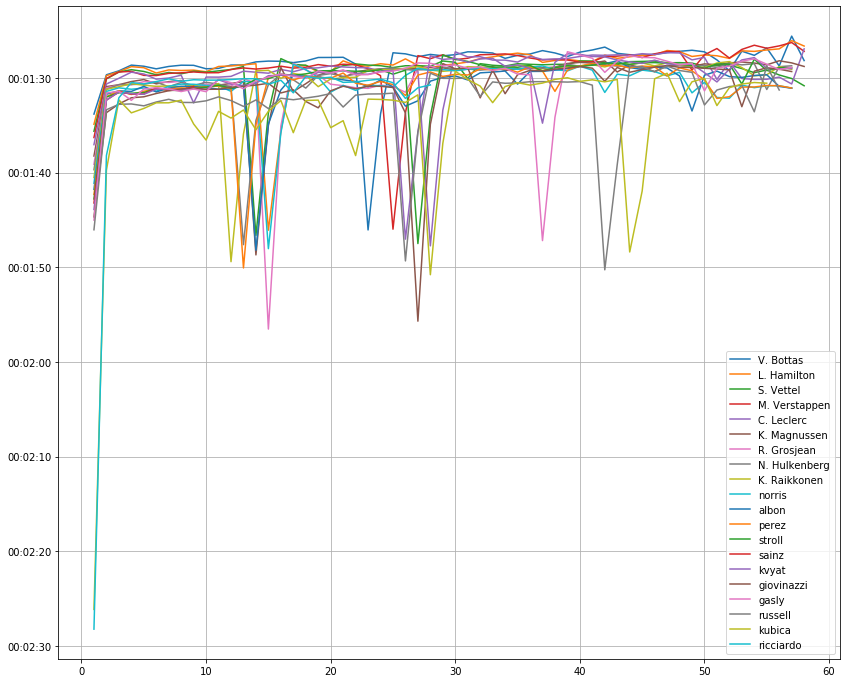

In [8]:
plt.figure(figsize=(14, 12))
for driver in driver_list[:]:
    x = race1_data[race1_data["driver"]==str(driver)]["lap"]
    y = race1_data[race1_data["driver"]==str(driver)]["lap_time"]
    plt.plot(x, y, label=str(driver))
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.show()

## Drawy safety car window (test)

In [9]:
safety_car_lap_time = pd.to_datetime(race1_data["lap_time"].mean()) + pd.to_timedelta(15, unit='s')
# race1_data[race1_data["lap_time"] > safety_car_lap_time]
# df['EndDate'] = pd.to_datetime(df['StartDate']) + pd.to_timedelta(df['duration'], unit='s')

In [10]:
safety_car_lap = []
for row in range(len(race1_data[race1_data["lap_time"] > safety_car_lap_time].loc[:,"lap"].drop_duplicates().sort_values()) - 1):
    if ((race1_data[race1_data["lap_time"] > safety_car_lap_time].loc[:,"lap"].drop_duplicates().sort_values().iloc[row] + 1) ==
       race1_data[race1_data["lap_time"] > safety_car_lap_time].loc[:,"lap"].drop_duplicates().sort_values().iloc[row+1]):
        safety_car_lap.append(race1_data[race1_data["lap_time"] > safety_car_lap_time].loc[:,"lap"].drop_duplicates().sort_values().iloc[row])
        safety_car_lap.append(race1_data[race1_data["lap_time"] > safety_car_lap_time].loc[:,"lap"].drop_duplicates().sort_values().iloc[row + 1])

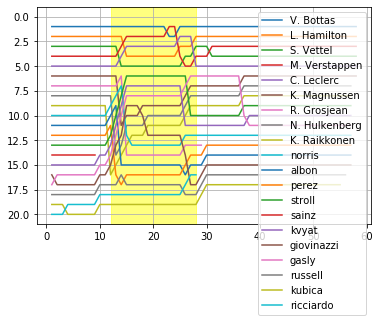

In [11]:
fig, ax = plt.subplots()
for driver in driver_list:
    x = race1_data[race1_data["driver"]==str(driver)]["lap"]
    y = race1_data[race1_data["driver"]==str(driver)]["position"]
    ax.plot(x, y, label=str(driver))
plt.gca().invert_yaxis()
ax.grid()
ax.fill_between(safety_car_lap, 1,
                color='yellow', alpha=0.5, transform=ax.get_xaxis_transform())
plt.legend()
plt.show()

## Convert datetime to millisecond format

In [12]:
race1_data = f1_data[f1_data["race_circuit"] == "race_01_albert_park"]

In [13]:
# Converting time to millisecond
temp_df = race1_data["lap_time"].str.replace('.',':').str.split(':', expand=True).astype(int).copy()
race1_data["lap_time_ms"] = temp_df[0] * 60 * 1000 + temp_df[1] * 1000 + temp_df[2]
race1_data

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,race_year,race_circuit,lap,driver,position,lap_time,lap_time_ms
0,year_2019,race_01_albert_park,1,bottas,1,1:33.813,93813
1,year_2019,race_01_albert_park,1,hamilton,2,1:34.887,94887
2,year_2019,race_01_albert_park,1,vettel,3,1:35.626,95626
3,year_2019,race_01_albert_park,1,max_verstappen,4,1:36.291,96291
4,year_2019,race_01_albert_park,1,leclerc,5,1:37.042,97042
...,...,...,...,...,...,...,...
1033,year_2019,race_01_albert_park,58,hamilton,2,1:26.627,86627
1034,year_2019,race_01_albert_park,58,max_verstappen,3,1:27.184,87184
1035,year_2019,race_01_albert_park,58,vettel,4,1:30.822,90822
1036,year_2019,race_01_albert_park,58,leclerc,5,1:26.926,86926
